# Network Analysis

<img src="https://researchmethods117203719.files.wordpress.com/2018/04/socialnetwork.jpg" />

Network analysis is an unsupervised analysis technique that find relationships (edges) between different entities (nodes). The analysis is based on <b>Graph Theory</b> concepts

In [1]:
library(igraph)
library(dplyr)

Warning message:
"package 'igraph' was built under R version 4.0.2"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Warning message:
"package 'dplyr' was built under R version 4.0.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:igraph':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
### dataset
df <- read.csv(file="https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat")
head(df)

,X2B,X410,AER,X2965,KZN,X2990,X,X0,CR2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,2B,410,ASF,2966,KZN,2990,,0,CR2
2,2B,410,ASF,2966,MRV,2962,,0,CR2
3,2B,410,CEK,2968,KZN,2990,,0,CR2
4,2B,410,CEK,2968,OVB,4078,,0,CR2
5,2B,410,DME,4029,KZN,2990,,0,CR2
6,2B,410,DME,4029,NBC,6969,,0,CR2


In [3]:
### companies flight counts
df %>% group_by(X2B) %>% tally() %>% arrange(desc(n)) %>% head(20)

X2B,n
<chr>,<int>
FR,2484
AA,2354
UA,2180
DL,1981
US,1960
CZ,1454
MU,1263
CA,1260
WN,1146


In [4]:
df %>% group_by(X2B) %>% tally() %>% filter(between(n,50,100)) %>% arrange(n) %>% head(20)

X2B,n
<chr>,<int>
9N,50
B7,50
PB,50
KY,52
MJ,52
MO,52
FI,53
J2,54
TM,54


In [5]:
#################################################
### selecting companies
### Small company (2L == Helvetic Airways)
#################################################
df %>% filter(X2B=="2L") %>% tally()

n
<int>
14


In [6]:
df2 <- df %>% filter(X2B=="2L") %>% 
  group_by(AER,KZN) %>% summarise(cnt=n())
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))

head(df2)

`summarise()` regrouping output by 'AER' (override with `.groups` argument)



AER,KZN,cnt
<chr>,<chr>,<int>
BDS,ZRH,1
BOD,ZRH,1
BRS,ZRH,1
GVA,LPA,1
LCA,ZRH,1
LPA,ZRH,1


In [7]:
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))
flt

[1] "BDS" "BOD" "BRS" "GVA" "LCA" "LPA" "RMF" "TFS" "ZRH"

In [8]:
mtx <- Matrix::Matrix(NA,nrow=length(flt),ncol =length(flt))

### iterate through the matrix
for(i in 1:length(flt)) {
  #res <- NULL
  for(j in 1:length(flt)) {
    if(is.na(as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"]))==F) {
      mtx[i,j] <- as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"])
    }
  }
}
colnames(mtx) = flt
rownames(mtx) = flt

In [9]:
mtx

9 x 9 Matrix of class "dgeMatrix"
    BDS BOD BRS GVA LCA LPA RMF TFS ZRH
BDS  NA  NA  NA  NA  NA  NA  NA  NA   1
BOD  NA  NA  NA  NA  NA  NA  NA  NA   1
BRS  NA  NA  NA  NA  NA  NA  NA  NA   1
GVA  NA  NA  NA  NA  NA   1  NA  NA  NA
LCA  NA  NA  NA  NA  NA  NA  NA  NA   1
LPA  NA  NA  NA  NA  NA  NA  NA  NA   1
RMF  NA  NA  NA  NA  NA  NA  NA  NA   1
TFS  NA  NA  NA   1  NA  NA  NA  NA  NA
ZRH   1   1   1  NA   1   1   1  NA  NA

In [10]:
links <- as.matrix(mtx)


In [11]:
mynet <- graph.adjacency(links, mode="directed",weighted=NULL)


In [12]:
### network size by edges
E(mynet)

+ 14/14 edges from 85cbbbb (vertex names):
 [1] BDS->ZRH BOD->ZRH BRS->ZRH GVA->LPA LCA->ZRH LPA->ZRH RMF->ZRH TFS->GVA
 [9] ZRH->BDS ZRH->BOD ZRH->BRS ZRH->LCA ZRH->LPA ZRH->RMF

In [13]:
### network size by vertices (nodes)
V(mynet)

+ 9/9 vertices, named, from 85cbbbb:
[1] BDS BOD BRS GVA LCA LPA RMF TFS ZRH

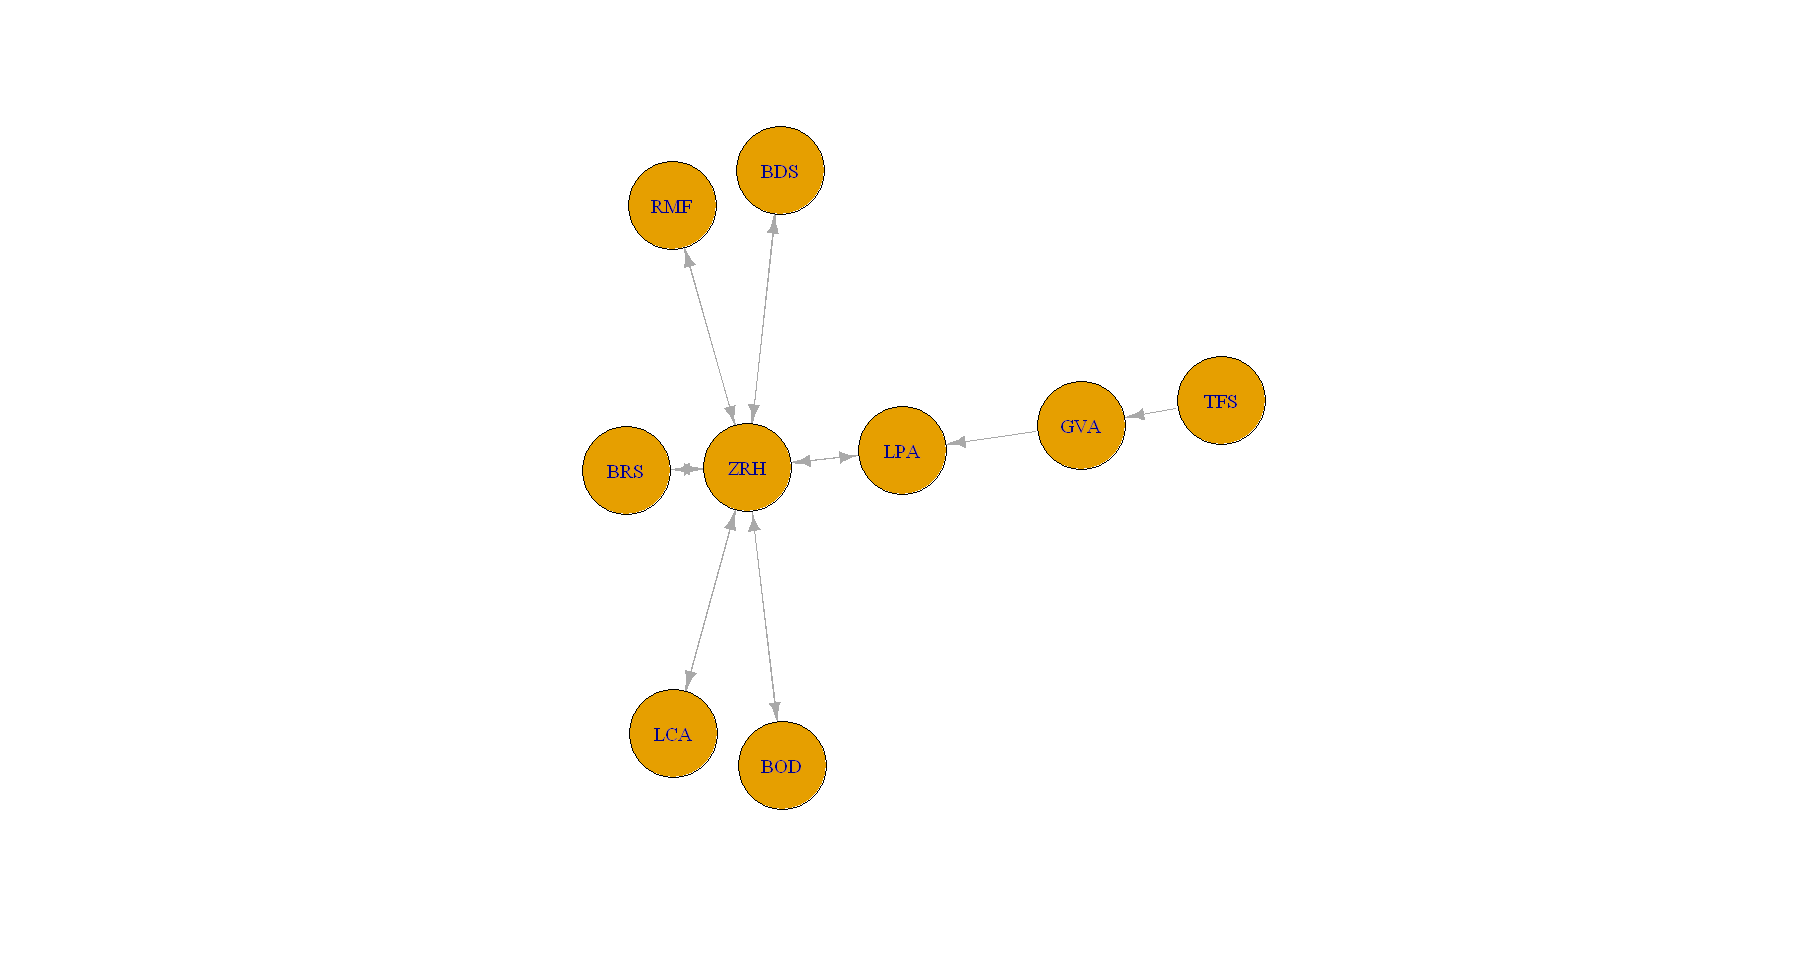

In [14]:
options(repr.plot.width = 15, repr.plot.height =8)

plot(mynet, edge.arrow.size=.6, vertex.size=30)


## General Measures
 
### Mean Distance

In [15]:
mean_distance(mynet, directed=F)

[1] 2.222222

### Network diameter

In [16]:
diameter(mynet, directed=F,weights=NA)

[1] 4

### Centrality

In [17]:
centr_degree(mynet,mode="in",normalized=T)

$res
[1] 1 1 1 1 1 2 1 0 6

$centralization
[1] 0.5555556

$theoretical_max
[1] 72

### Connection density

In [18]:
edge_density(mynet,loops=F)

[1] 0.1944444

### Degree (number of connections of a node to other nodes)

In [19]:
degree(mynet)

BDS BOD BRS GVA LCA LPA RMF TFS ZRH 
  2   2   2   2   2   3   2   1  12

In [20]:
mean(degree(mynet))

[1] 3.111111

## Centrality
 
### Hubs

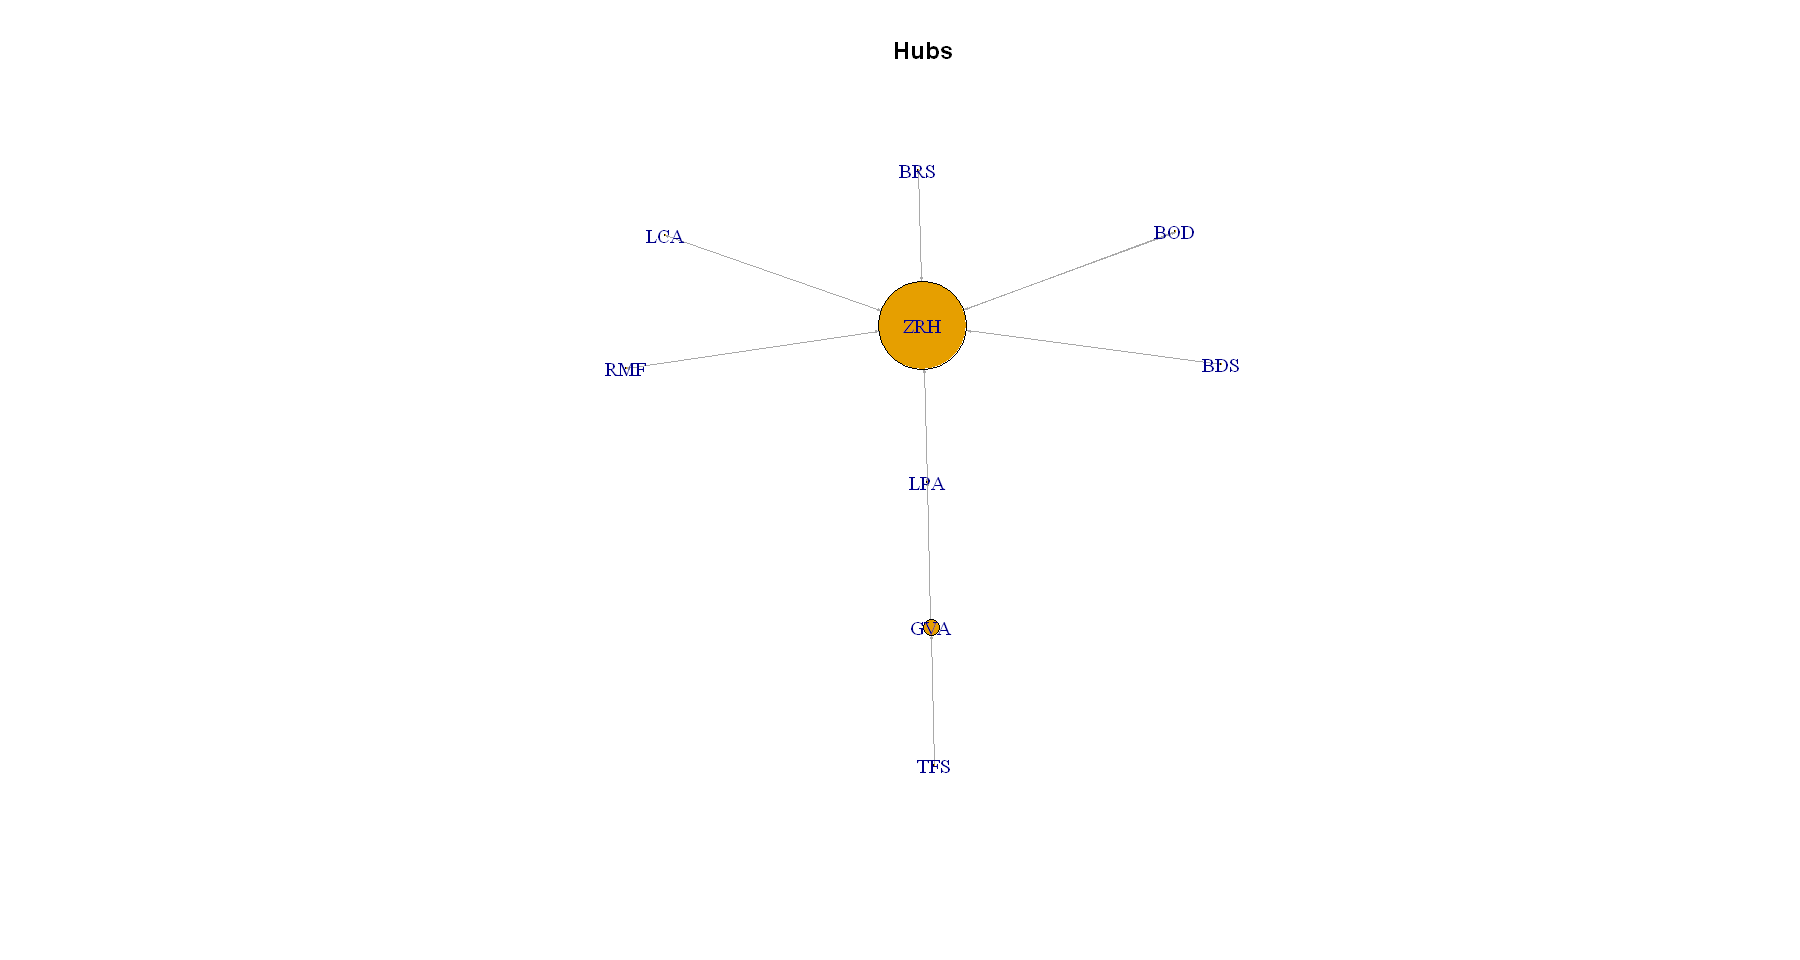

In [21]:
set.seed(11)

hs <- hub_score(mynet)$vector
plot(mynet, vertex.size=hs * 30,main="Hubs",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Authority

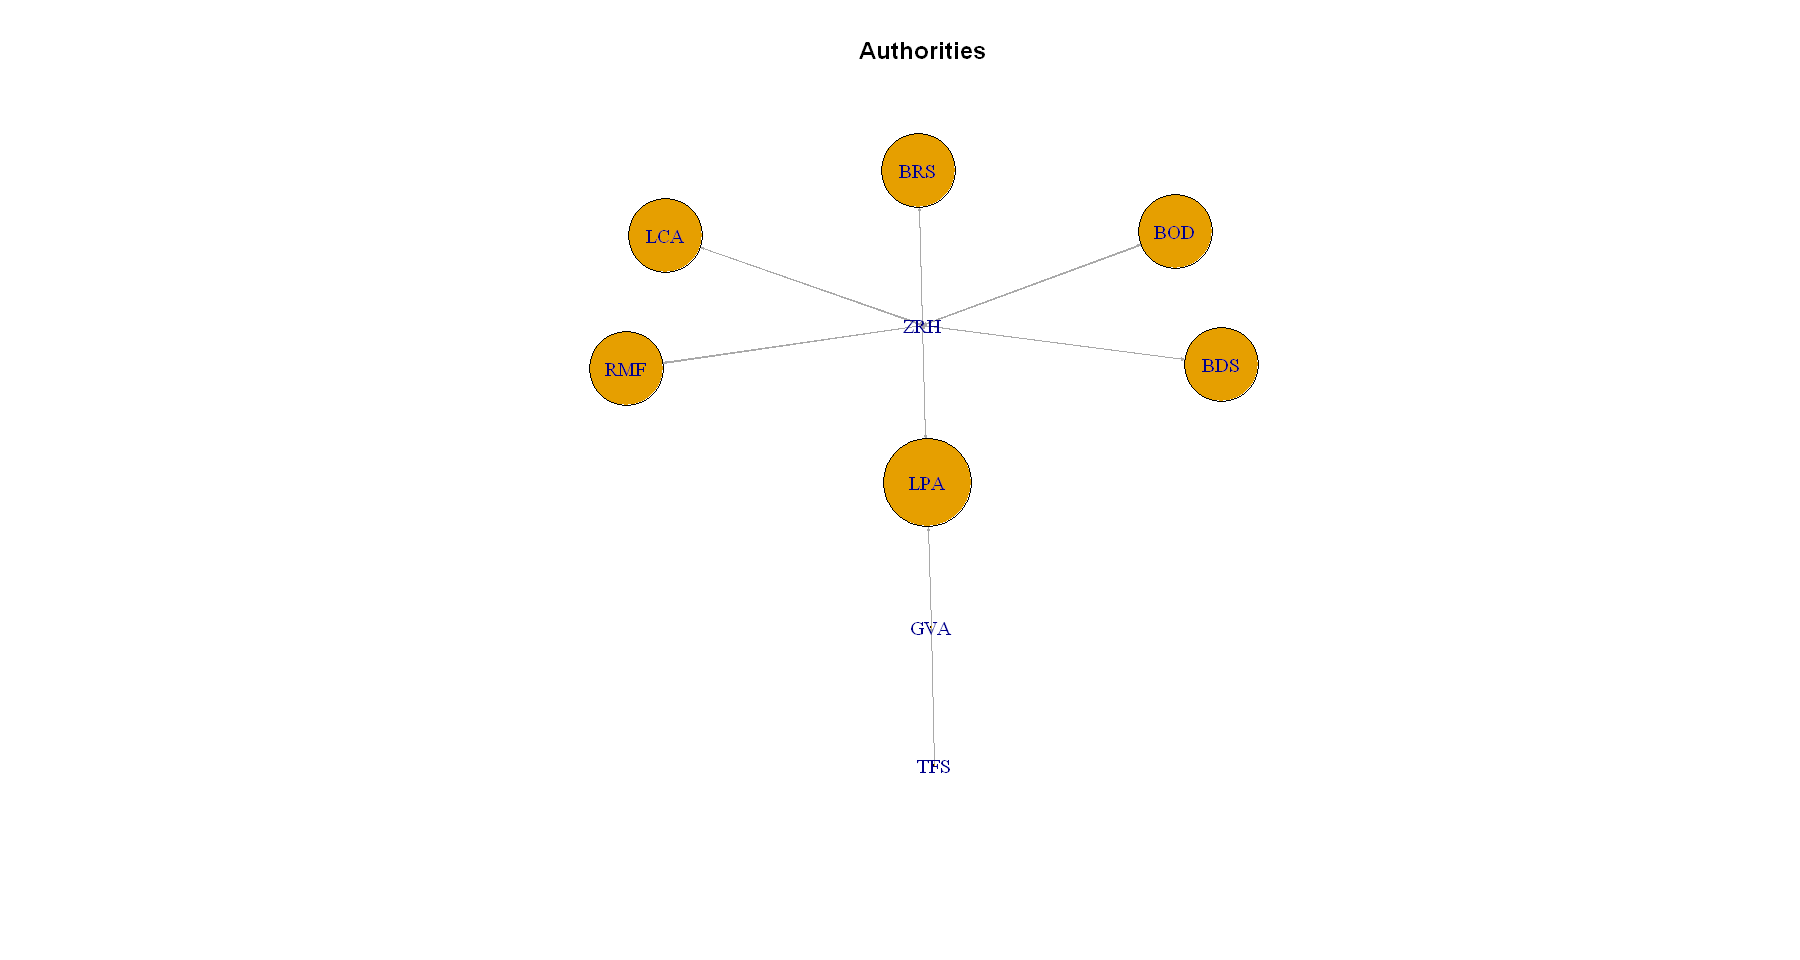

In [22]:
set.seed(11)

au <- authority_score(mynet)$vector
plot(mynet, vertex.size=au * 30,main="Authorities",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Community

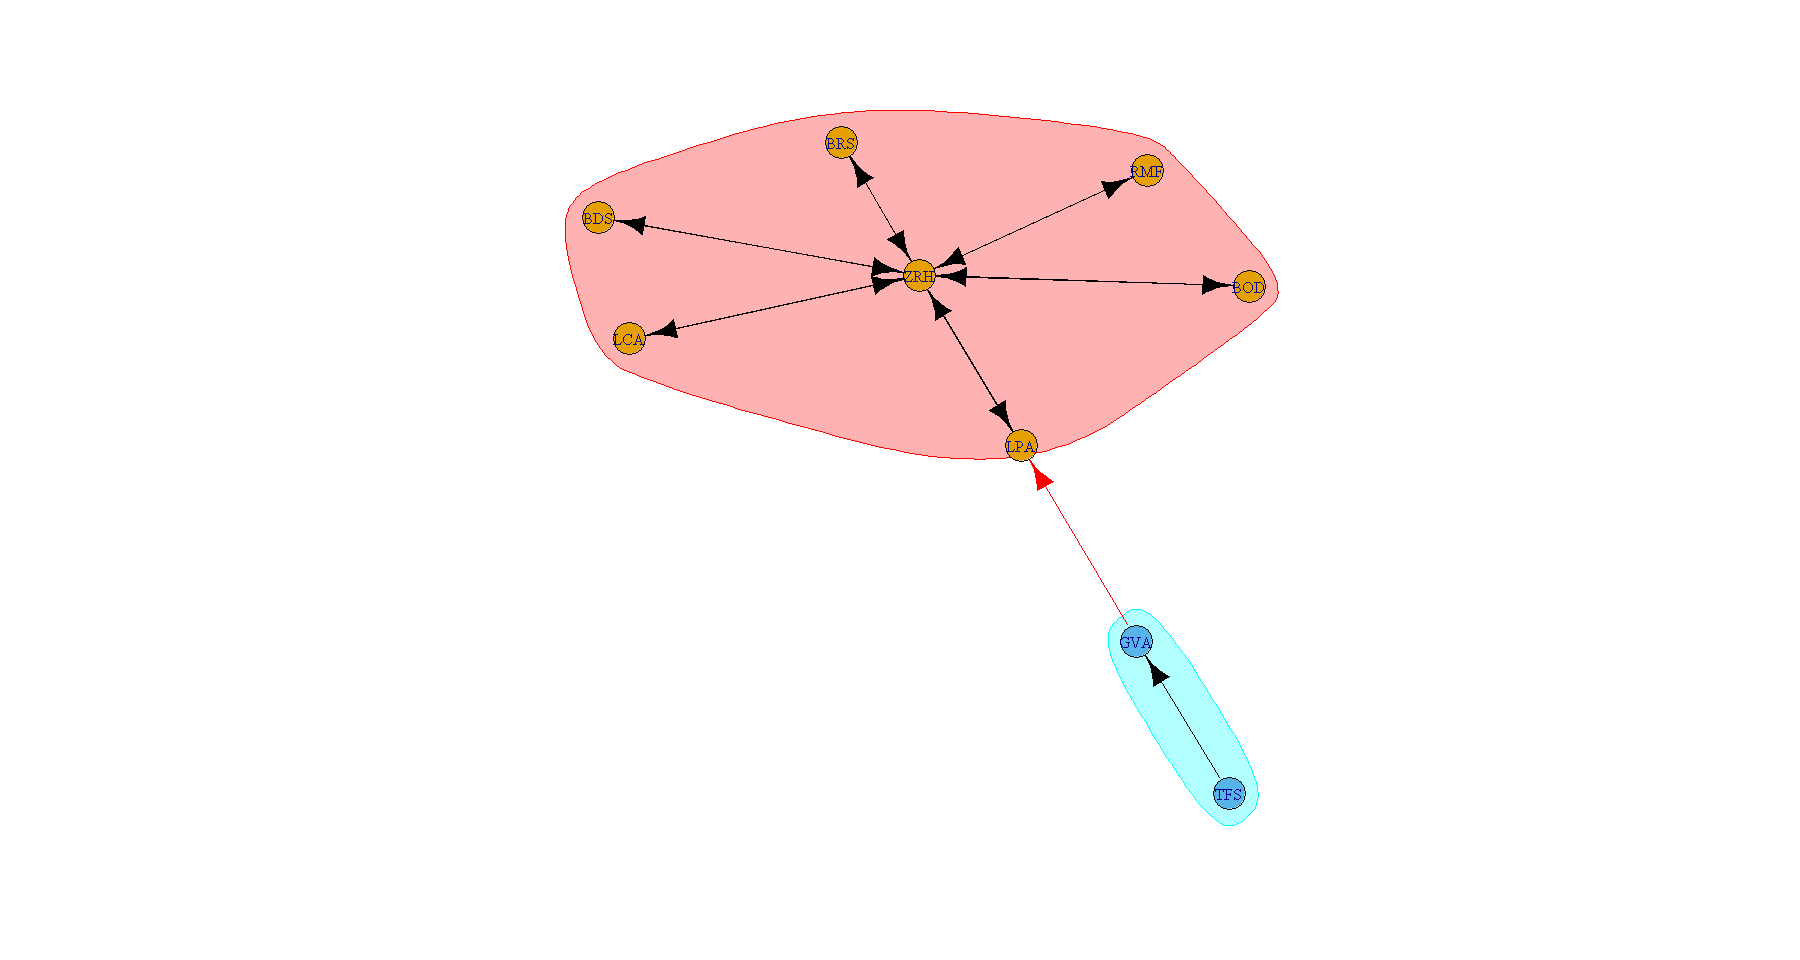

In [23]:
### community
cnet <- cluster_edge_betweenness(mynet)
plot(cnet, mynet, vertex.size=10, vertex.label.cex=0.8)

## Cohesive groups: Cliques and Clusters
 
### Cliques (group of nodes fully connected to each other)

In [24]:
cliques(mynet)

Warning message in cliques(mynet):
"At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations"


[[1]]
+ 1/9 vertex, named, from 85cbbbb:
[1] ZRH

[[2]]
+ 1/9 vertex, named, from 85cbbbb:
[1] GVA

[[3]]
+ 1/9 vertex, named, from 85cbbbb:
[1] TFS

[[4]]
+ 2/9 vertices, named, from 85cbbbb:
[1] GVA TFS

[[5]]
+ 1/9 vertex, named, from 85cbbbb:
[1] RMF

[[6]]
+ 2/9 vertices, named, from 85cbbbb:
[1] RMF ZRH

[[7]]
+ 1/9 vertex, named, from 85cbbbb:
[1] LPA

[[8]]
+ 2/9 vertices, named, from 85cbbbb:
[1] GVA LPA

[[9]]
+ 2/9 vertices, named, from 85cbbbb:
[1] LPA ZRH

[[10]]
+ 1/9 vertex, named, from 85cbbbb:
[1] LCA

[[11]]
+ 2/9 vertices, named, from 85cbbbb:
[1] LCA ZRH

[[12]]
+ 1/9 vertex, named, from 85cbbbb:
[1] BRS

[[13]]
+ 2/9 vertices, named, from 85cbbbb:
[1] BRS ZRH

[[14]]
+ 1/9 vertex, named, from 85cbbbb:
[1] BOD

[[15]]
+ 2/9 vertices, named, from 85cbbbb:
[1] BOD ZRH

[[16]]
+ 1/9 vertex, named, from 85cbbbb:
[1] BDS

[[17]]
+ 2/9 vertices, named, from 85cbbbb:
[1] BDS ZRH


In [25]:
sapply(cliques(mynet), length)

Warning message in cliques(mynet):
"At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations"


[1] 1 1 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2

In [26]:
largest_cliques(mynet)

Warning message in largest_cliques(mynet):
"At cliques.c:1087 :directionality of edges is ignored for directed graphs"


[[1]]
+ 2/9 vertices, named, from 85cbbbb:
[1] ZRH RMF

[[2]]
+ 2/9 vertices, named, from 85cbbbb:
[1] ZRH LPA

[[3]]
+ 2/9 vertices, named, from 85cbbbb:
[1] ZRH LCA

[[4]]
+ 2/9 vertices, named, from 85cbbbb:
[1] ZRH BRS

[[5]]
+ 2/9 vertices, named, from 85cbbbb:
[1] ZRH BOD

[[6]]
+ 2/9 vertices, named, from 85cbbbb:
[1] ZRH BDS

[[7]]
+ 2/9 vertices, named, from 85cbbbb:
[1] TFS GVA

[[8]]
+ 2/9 vertices, named, from 85cbbbb:
[1] GVA LPA


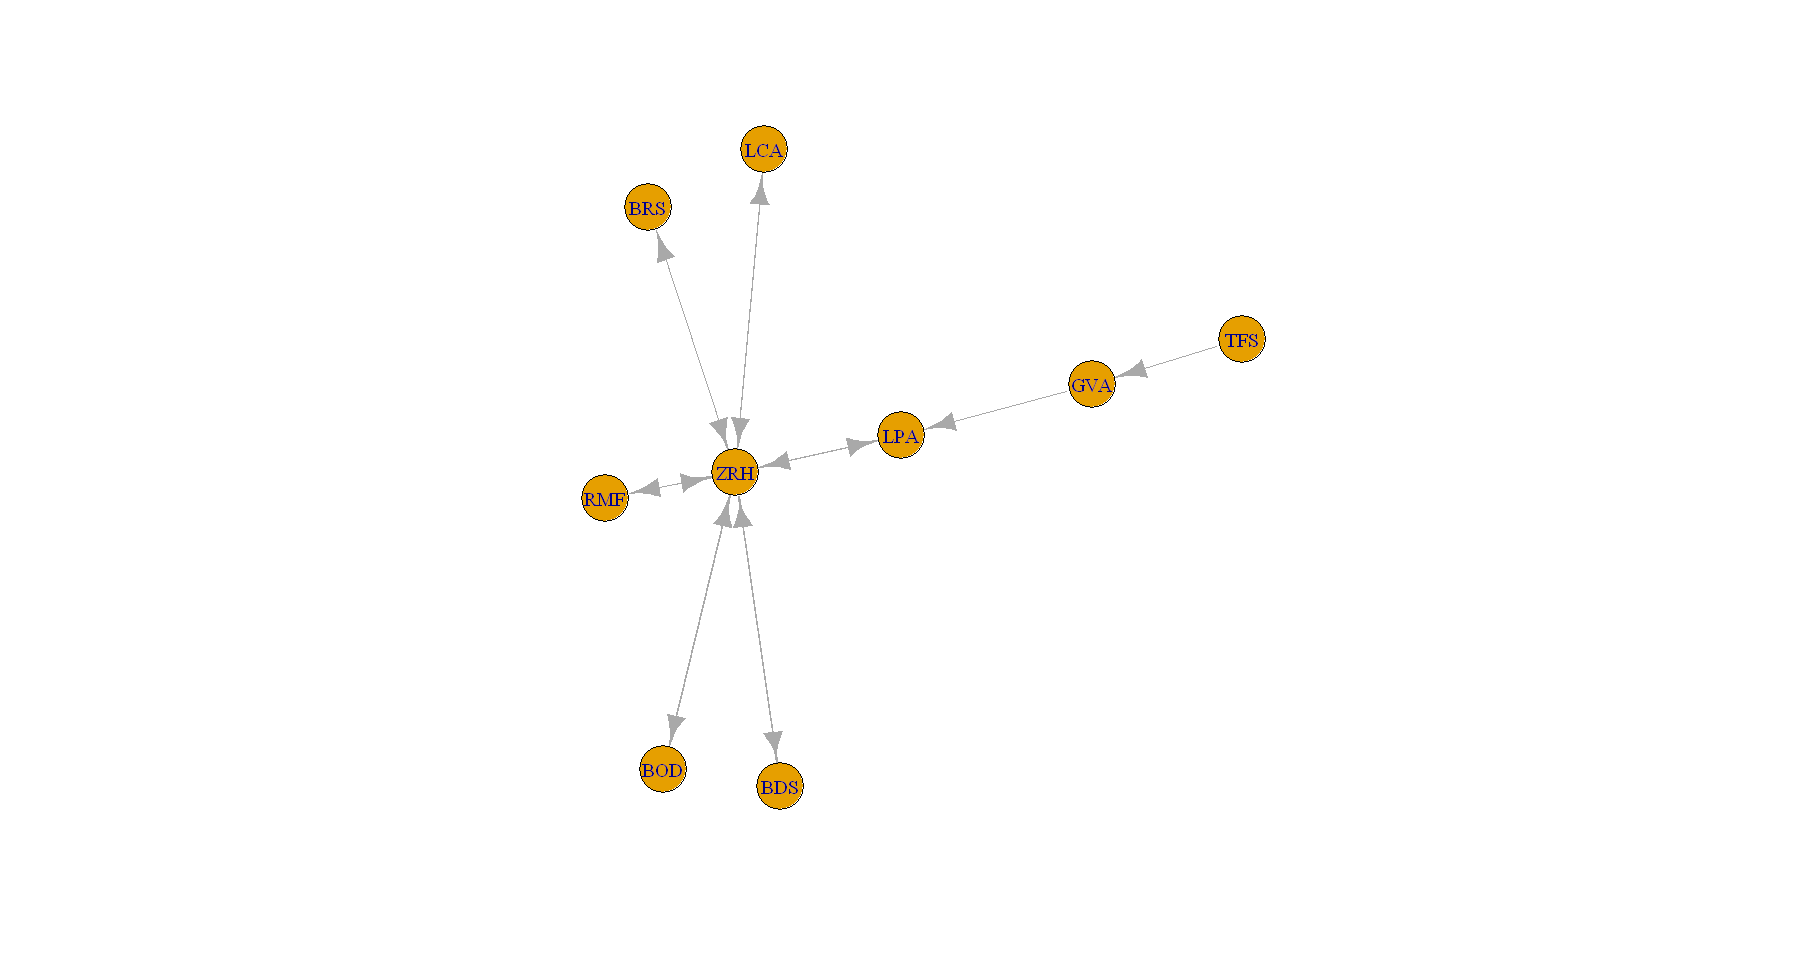

In [27]:
plot(as.directed(mynet))

### Clusters 

In [28]:
btwn <- cluster_edge_betweenness(mynet)
btwn

IGRAPH clustering edge betweenness, groups: 2, mod: 0.12
+ groups:
  $`1`
  [1] "BDS" "BOD" "BRS" "LCA" "LPA" "RMF" "ZRH"
  
  $`2`
  [1] "GVA" "TFS"
  

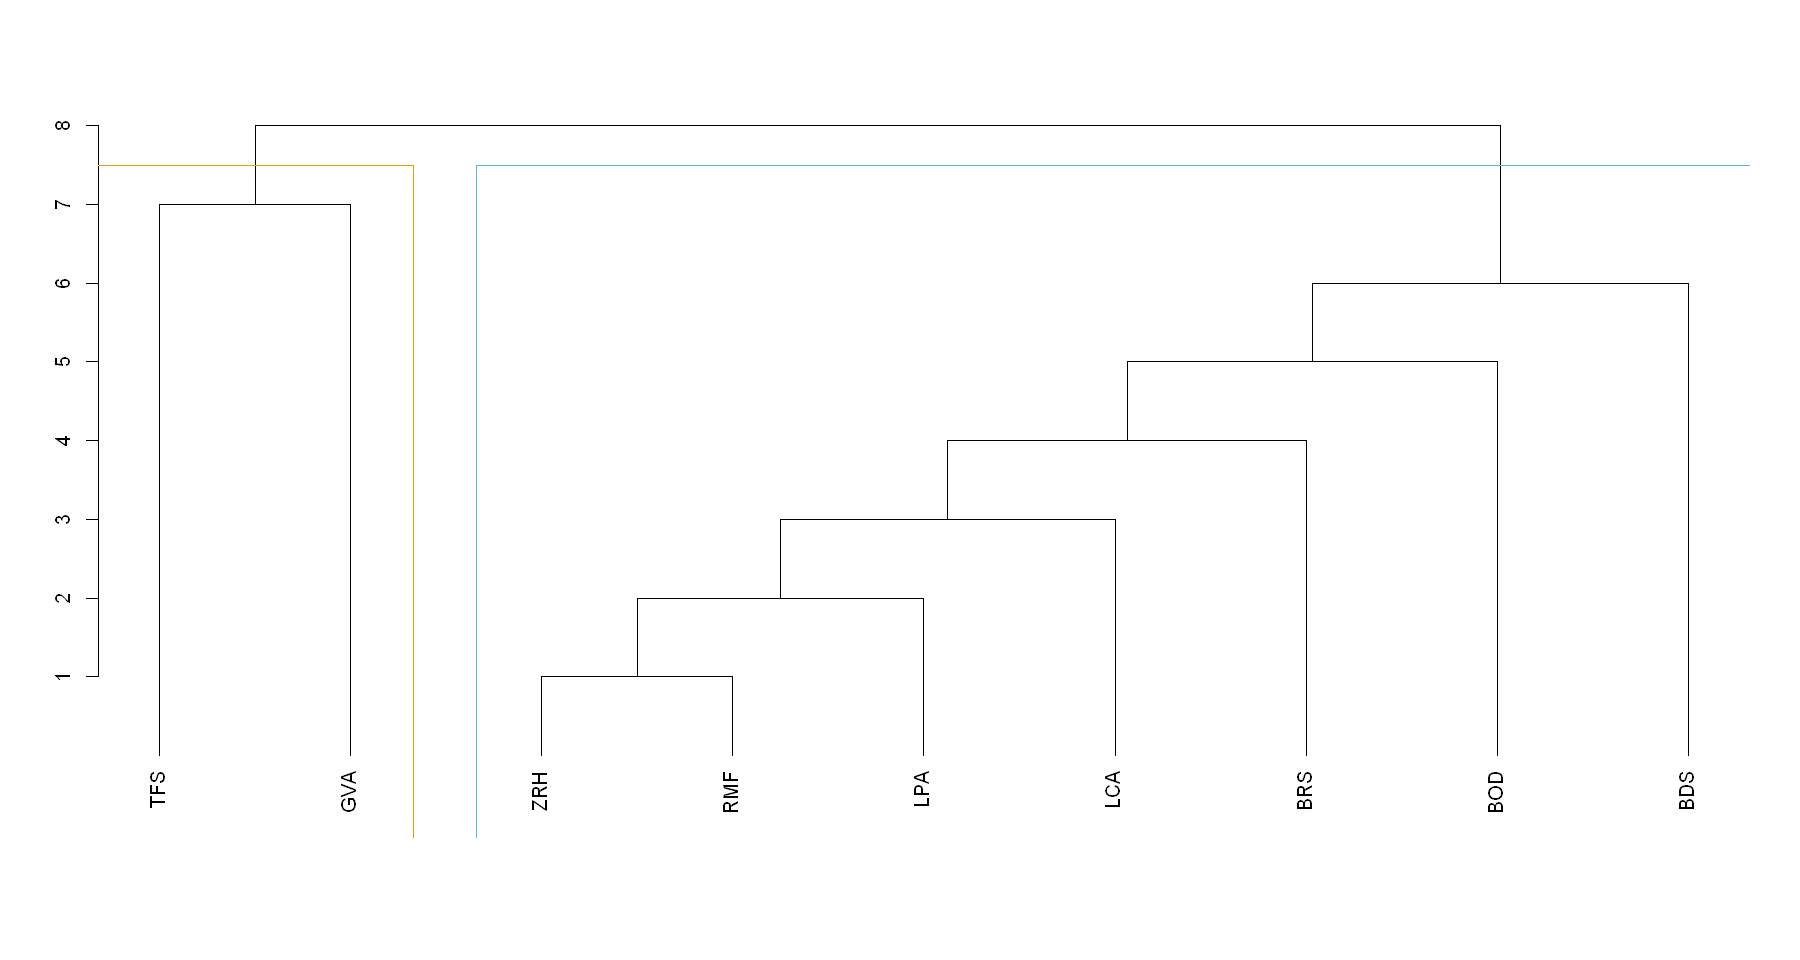

In [29]:
dendPlot(btwn, mode="hclust")

In [30]:
length(btwn)

[1] 2

In [31]:
membership(btwn)

BDS BOD BRS GVA LCA LPA RMF TFS ZRH 
  1   1   1   2   1   1   1   2   1 